<a href="https://colab.research.google.com/github/sahoopuspanjali/PracticalMachineLearning/blob/master/HW3_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade tensorflow

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, LSTM, SimpleRNN
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook

Using TensorFlow backend.


In [0]:
!pip install quandl

In [0]:
import quandl
mydata = quandl.get("WIKI/AAPL", api_key= '95xc86L7e41gzuatEQMy' )


In [0]:
mydata

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.750,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.250,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.250,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.870,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.630,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


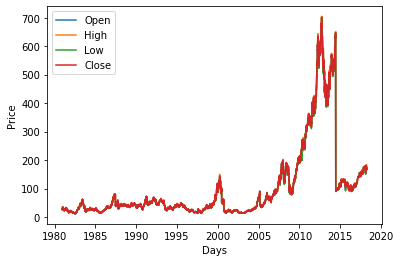

In [0]:
plt.figure()
plt.plot(mydata["Open"])
plt.plot(mydata["High"])
plt.plot(mydata["Low"])
plt.plot(mydata["Close"])
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

We are considering only "Close" stock prices

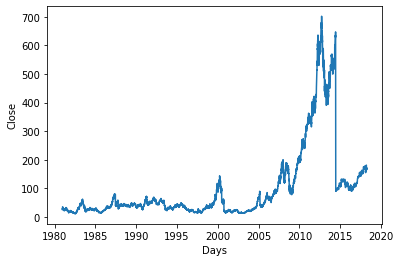

In [0]:
plt.figure()
plt.plot(mydata["Close"])
plt.ylabel('Close')
plt.xlabel('Days')
plt.show()

Create chunk of size 50

In [0]:
closedata1 = mydata['Adj. Close'].values
new_closedata = closedata1.reshape(int(closedata1.shape[0]/50), 50, 1)
new_closedata[0].shape

(50, 1)

In [0]:
new_closedata.shape

(188, 50, 1)

Split into train and test set

In [0]:
X_train, y_train = new_closedata[:int(new_closedata.shape[0]*0.7), :50],new_closedata[:int(new_closedata.shape[0]*0.7), -1]
X_val, y_val = new_closedata[int(new_closedata.shape[0]*0.7):int(new_closedata.shape[0]*0.8), :50], new_closedata[int(new_closedata.shape[0]*0.7):int(new_closedata.shape[0]*0.8), -1] 
X_test, y_test = new_closedata[int(new_closedata.shape[0]*0.8):, :50], new_closedata[int(new_closedata.shape[0]*0.8):, -1]

In [0]:
X_train.shape, y_train.shape

((131, 50, 1), (131, 1))

In [0]:
X_val.shape, y_val.shape


((19, 50, 1), (19, 1))

In [0]:
X_test.shape, y_test.shape


((38, 50, 1), (38, 1))

With Simple RNN

In [0]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)

])

optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss="mse", optimizer=optimizer)
h = model.fit(X_train, y_train, epochs=20,validation_data=(X_val, y_val))


Train on 131 samples, validate on 19 samples
Epoch 1/20
131/131 [==============================] - 3s 21ms/sample - loss: 4.3097 - val_loss: 363.1880
Epoch 2/20
131/131 [==============================] - 0s 1ms/sample - loss: 1.9665 - val_loss: 324.9443
Epoch 3/20
131/131 [==============================] - 0s 1ms/sample - loss: 1.4244 - val_loss: 301.8562
Epoch 4/20
131/131 [==============================] - 0s 1ms/sample - loss: 1.0562 - val_loss: 283.7194
Epoch 5/20
131/131 [==============================] - 0s 1ms/sample - loss: 0.8260 - val_loss: 270.8038
Epoch 6/20
131/131 [==============================] - 0s 1ms/sample - loss: 0.6656 - val_loss: 257.1572
Epoch 7/20
131/131 [==============================] - 0s 1ms/sample - loss: 0.5091 - val_loss: 245.3101
Epoch 8/20
131/131 [==============================] - 0s 1ms/sample - loss: 0.3994 - val_loss: 234.8170
Epoch 9/20
131/131 [==============================] - 0s 1ms/sample - loss: 0.3287 - val_loss: 224.5418
Epoch 10/20
131/13

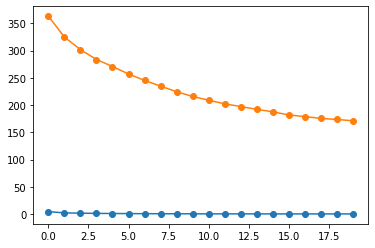

In [0]:

import matplotlib.pyplot as plt
plt.plot(h.history['loss'], 'o-')
plt.plot(h.history['val_loss'], 'o-')

In [0]:
model.evaluate(X_val, y_val)

19/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 557us/sample - loss: 171.2366


171.2366180419922

In [0]:
y_pred = model.predict(X_test)
y_pred.shape

(38, 1)

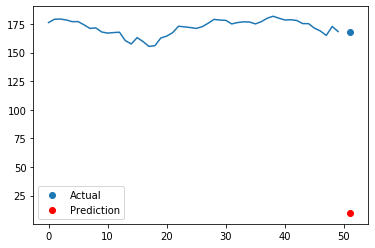

In [0]:
plt.plot(X_test[-1])
plt.scatter(x = X_test[-1].shape[0]+1, y = y_test[-1], label = 'Actual')
plt.scatter(x = X_test[-1].shape[0]+1, y = y_pred[-1], c = 'r', label = 'Prediction')
plt.legend();

There is a huge gap in the prediction and the actual data. We need to improve it before that lets see the LSTM and GRU models

LSTM

In [0]:
model_LSTM = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20),
    keras.layers.Dense(1)
])

model_LSTM.compile(loss="mse", optimizer='adam')
h_LSTM = model_LSTM.fit(X_train, y_train, epochs=30,validation_data = (X_val, y_val))

Train on 131 samples, validate on 19 samples
Epoch 1/30
131/131 [==============================] - 6s 46ms/sample - loss: 7.6579 - val_loss: 479.4988
Epoch 2/30
131/131 [==============================] - 0s 2ms/sample - loss: 6.9558 - val_loss: 470.3541
Epoch 3/30
131/131 [==============================] - 0s 2ms/sample - loss: 6.2693 - val_loss: 461.9048
Epoch 4/30
131/131 [==============================] - 0s 2ms/sample - loss: 5.6819 - val_loss: 452.4491
Epoch 5/30
131/131 [==============================] - 0s 2ms/sample - loss: 5.1114 - val_loss: 441.8205
Epoch 6/30
131/131 [==============================] - 0s 2ms/sample - loss: 4.4970 - val_loss: 431.0997
Epoch 7/30
131/131 [==============================] - 0s 2ms/sample - loss: 4.0389 - val_loss: 419.4834
Epoch 8/30
131/131 [==============================] - 0s 2ms/sample - loss: 3.6264 - val_loss: 410.0077
Epoch 9/30
131/131 [==============================] - 0s 2ms/sample - loss: 3.4363 - val_loss: 401.6274
Epoch 10/30
131/13

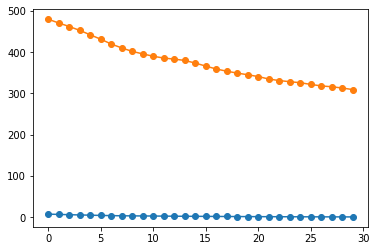

In [0]:
plt.plot(h_LSTM.history['loss'], 'o-')
plt.plot(h_LSTM.history['val_loss'], 'o-')

In [0]:
model_LSTM.evaluate(X_val, y_val)

19/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 702us/sample - loss: 309.2342


309.23419189453125

In [0]:
y_pred_lstm = model_LSTM.predict(X_test)
y_pred_lstm.shape

(38, 1)

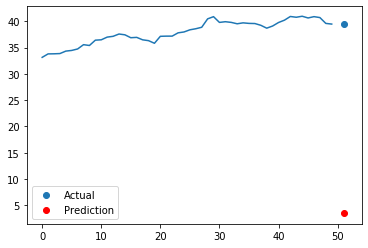

In [0]:
plt.plot(X_test[0])
plt.scatter(x = X_test[0].shape[0]+1, y = y_test[0], label = 'Actual')
plt.scatter(x = X_test[0].shape[0]+1, y = y_pred_lstm[0], c = 'r', label = 'Prediction')
plt.legend();

With GRU modele:


In [0]:
model_GRU = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20),
    keras.layers.Dense(1)
])

model_GRU.compile(loss="mse", optimizer="adam")
h_GRU = model_GRU.fit(X_train, y_train, epochs=20,validation_data=(X_val, y_val))


Train on 131 samples, validate on 19 samples
Epoch 1/20
131/131 [==============================] - 6s 44ms/sample - loss: 6.7794 - val_loss: 453.2168
Epoch 2/20
131/131 [==============================] - 0s 3ms/sample - loss: 5.5585 - val_loss: 432.0545
Epoch 3/20
131/131 [==============================] - 0s 3ms/sample - loss: 4.5634 - val_loss: 412.2389
Epoch 4/20
131/131 [==============================] - 0s 3ms/sample - loss: 3.7239 - val_loss: 393.5215
Epoch 5/20
131/131 [==============================] - 0s 3ms/sample - loss: 3.0354 - val_loss: 375.7985
Epoch 6/20
131/131 [==============================] - 0s 2ms/sample - loss: 2.5781 - val_loss: 360.5156
Epoch 7/20
131/131 [==============================] - 0s 3ms/sample - loss: 2.2626 - val_loss: 347.3453
Epoch 8/20
131/131 [==============================] - 0s 3ms/sample - loss: 2.1243 - val_loss: 335.7815
Epoch 9/20
131/131 [==============================] - 0s 2ms/sample - loss: 1.9640 - val_loss: 328.7131
Epoch 10/20
131/13

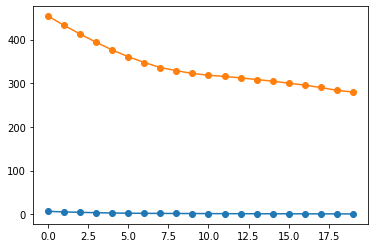

In [0]:
plt.plot(h_GRU.history['loss'], 'o-')
plt.plot(h_GRU.history['val_loss'], 'o-')

In [0]:
model_GRU.evaluate(X_val, y_val)

19/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 694us/sample - loss: 279.8201


279.820068359375

In [0]:
y_pred_gru = model_GRU.predict(X_test)
y_pred_gru.shape

(38, 1)

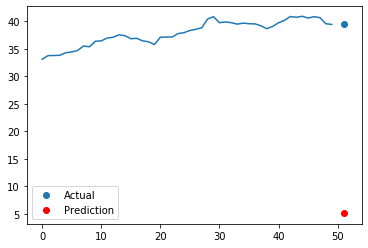

In [0]:
plt.plot(X_test[0])
plt.scatter(x = X_test[0].shape[0]+1, y = y_test[0], label = 'Actual')
plt.scatter(x = X_test[0].shape[0]+1, y = y_pred_gru[0], c = 'r', label = 'Prediction')
plt.legend();